# Boa Tarde

### Cesar Merjan e 1 min
1. Engenheiro Ambiental formado no Centro Univercitário SENAC
2. Iniciação Científica, TCC (Prêmio), **Modelagem Ambiental**
3. Geoprocessamento
4. Python na minha vida
5. Análises Ambientais para DuPont


## Temas

Objetivos e Importância da Análise de Dados.

Estatística Básica no Python.

Pandas para Análise de Dados

Matplotlib uma Ferramenta para Compreensão e Comunicação de Resultados.

Exemplos e Aplicações.

# Por que Análisar os Dados?

Por que sim ué

## Estatística basica (Medidas Resumo)

Média,
Mediana,
Desvio Padrão,
Quartis.

Regressões e Correlações.

# Pandas (Data Análysis)


*Panel Data*


### Numpy + Dicionários

## Matplotlib e Data Science na Prática

# Um amigo meu fez uma entrevista

1) O comportamento dos usuários de redes sociais é extremamente sazonal, dessa forma, precisamos entender como o alcance se relaciona com a data e com o horário do post, para depois entender qual a tendência de crescimento.

2) É possível identificar uma diferença de desempenho sazonal? Explique e demonstre.

3) Crie uma previsão de alcance, curtidas e cliques no link para um post que foi realizado em 03/06/2015 às 16h, considere que o comportamento da rede se manteve o mesmo no período.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [4]:
#Arquivo o arquivo csv com os dados com o pandas
dados = pd.read_csv("dados.txt", sep=',')
print(dados.head())

   ID        Data   Hora  Alcance  Curtidas  Cliques_no_link
0   1  01/05/2015  06:00     1000        33               10
1   2  01/05/2015  06:30     1500        50               15
2   3  01/05/2015  07:00     1800        60               18
3   4  01/05/2015  07:30     2300        77               23
4   5  01/05/2015  08:00     2100        70               21


# Mas o que o Pandas fez?

Sabe o Excel?

Então tipo isso.

In [5]:
# Você pode obter os dados das colunas:
print(dados["Curtidas"].head())

0    33
1    50
2    60
3    77
4    70
Name: Curtidas, dtype: int64


In [6]:
# Ou você pode obter os dados da linha:
print(dados.iloc[0])

ID                          1
Data               01/05/2015
Hora                    06:00
Alcance                  1000
Curtidas                   33
Cliques_no_link            10
Name: 0, dtype: object


### Primeiras observações

1. Manter só o necessário
2. Saber o tipo de dados que você está trabalhando

In [7]:
del dados["ID"]

In [8]:
print(dados.head())

         Data   Hora  Alcance  Curtidas  Cliques_no_link
0  01/05/2015  06:00     1000        33               10
1  01/05/2015  06:30     1500        50               15
2  01/05/2015  07:00     1800        60               18
3  01/05/2015  07:30     2300        77               23
4  01/05/2015  08:00     2100        70               21


In [9]:
print(dados.dtypes)

Data               object
Hora               object
Alcance             int64
Curtidas            int64
Cliques_no_link     int64
dtype: object


***Para os cálculos preciso que a data e a hora seja do tipo datetime, mas não quero perder as colunas Data e Hora***

In [10]:
# Concatenação de Strings
dados["Data&Hora"] = dados["Data"] + "-" + dados["Hora"]

In [11]:
print(dados.head())

         Data   Hora  Alcance  Curtidas  Cliques_no_link         Data&Hora
0  01/05/2015  06:00     1000        33               10  01/05/2015-06:00
1  01/05/2015  06:30     1500        50               15  01/05/2015-06:30
2  01/05/2015  07:00     1800        60               18  01/05/2015-07:00
3  01/05/2015  07:30     2300        77               23  01/05/2015-07:30
4  01/05/2015  08:00     2100        70               21  01/05/2015-08:00


In [12]:
print(dados.dtypes)

Data               object
Hora               object
Alcance             int64
Curtidas            int64
Cliques_no_link     int64
Data&Hora          object
dtype: object


In [13]:
# Transformo as strings da coluna nova no tipo datetime 
dados["Data&Hora"] = pd.to_datetime(dados["Data&Hora"], format='%d/%m/%Y-%H:%M')

In [14]:
print(dados.head())

         Data   Hora  Alcance  Curtidas  Cliques_no_link           Data&Hora
0  01/05/2015  06:00     1000        33               10 2015-05-01 06:00:00
1  01/05/2015  06:30     1500        50               15 2015-05-01 06:30:00
2  01/05/2015  07:00     1800        60               18 2015-05-01 07:00:00
3  01/05/2015  07:30     2300        77               23 2015-05-01 07:30:00
4  01/05/2015  08:00     2100        70               21 2015-05-01 08:00:00


In [15]:
print(dados.dtypes)

Data                       object
Hora                       object
Alcance                     int64
Curtidas                    int64
Cliques_no_link             int64
Data&Hora          datetime64[ns]
dtype: object


### Deu certo!

# Bora começar a analisar com estatística.

***Com Pandas é fácil assim***

In [16]:
print(dados.describe())

            Alcance     Curtidas  Cliques_no_link
count   1147.000000  1147.000000      1147.000000
mean    4816.711421   160.558849        41.176112
std     4967.513147   165.579565        37.668973
min      500.000000    17.000000         5.000000
25%     1924.000000    64.000000        17.000000
50%     3279.000000   109.000000        30.000000
75%     5717.000000   191.000000        51.000000
max    36979.000000  1233.000000       247.000000


# Plotagem direto com Pandas para uma visão geral

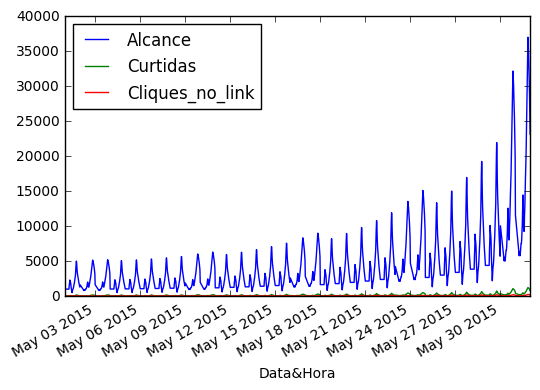

In [17]:
dados.plot(x='Data&Hora')

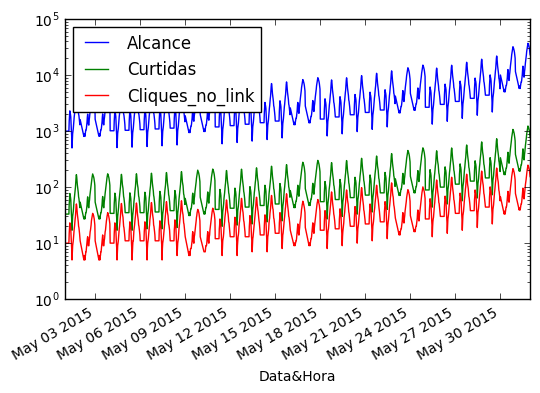

In [18]:
dados.plot(x='Data&Hora',logy=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x059C2570>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x059351B0>], dtype=object)

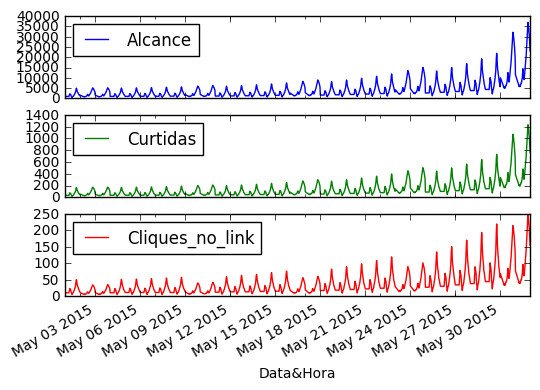

In [19]:
dados.plot(x='Data&Hora', subplots=True)

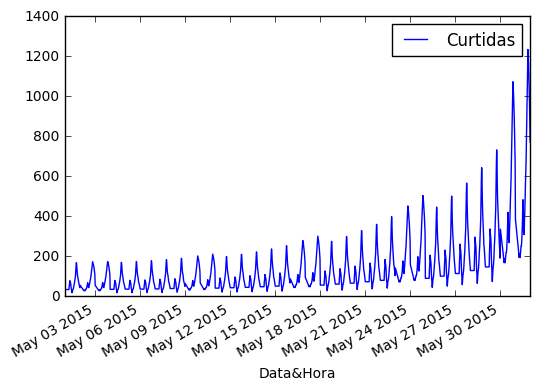

In [20]:
dados.plot(x='Data&Hora', y='Curtidas')

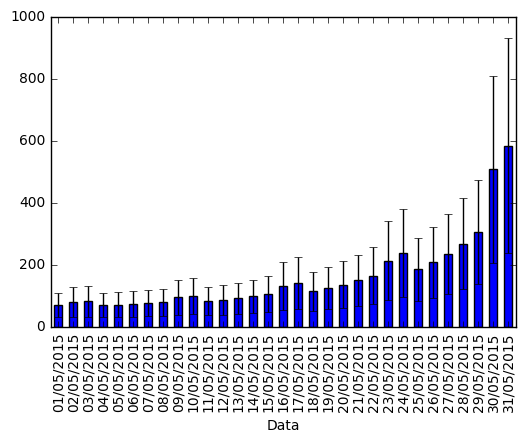

In [21]:
dados.groupby("Data").mean()["Curtidas"].plot.bar(yerr=dados.groupby("Data").std()["Curtidas"])

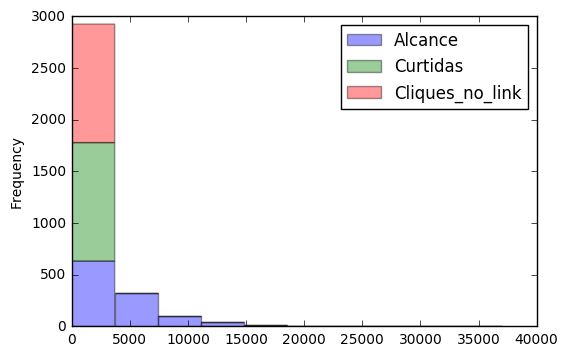

In [22]:
dados.plot.hist(stacked=True, alpha=0.4)

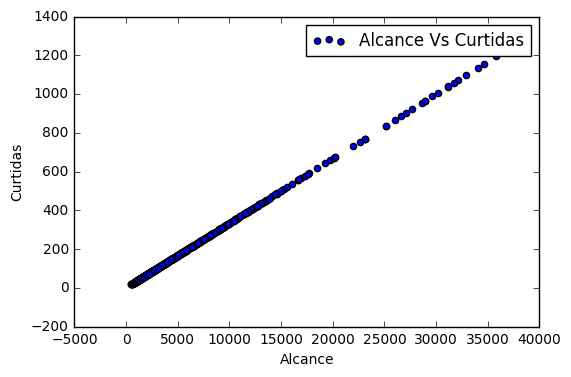

In [23]:
dados.plot.scatter(x='Alcance', y='Curtidas', label='Alcance Vs Curtidas')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x059D79F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x05B1E710>]], dtype=object)

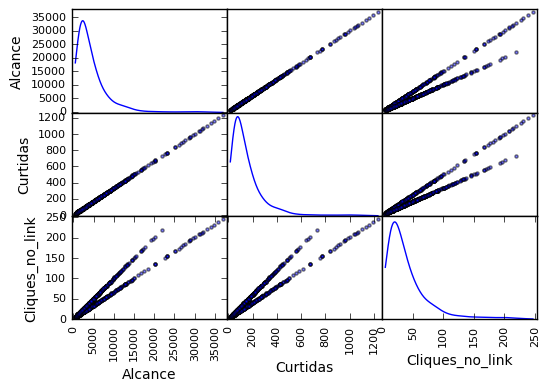

In [24]:
pd.scatter_matrix(dados, diagonal='kde')

# Então vamos começar a responder

O comportamento dos usuários de redes sociais é extremamente sazonal, dessa forma, precisamos entender como o alcance se relaciona com a data e com o horário do post, para depois entender qual a tendência de crescimento.

## Alcance em função da Data

In [25]:
grupo = "Alcance"
datas = dados.groupby("Data").first()["Data&Hora"]
medias = dados.groupby("Data").mean()[grupo]
medianas = dados.groupby("Data").median()[grupo]
quart_25 = dados.groupby("Data").quantile(.25)[grupo]
quart_75 = dados.groupby("Data").quantile(.75)[grupo]

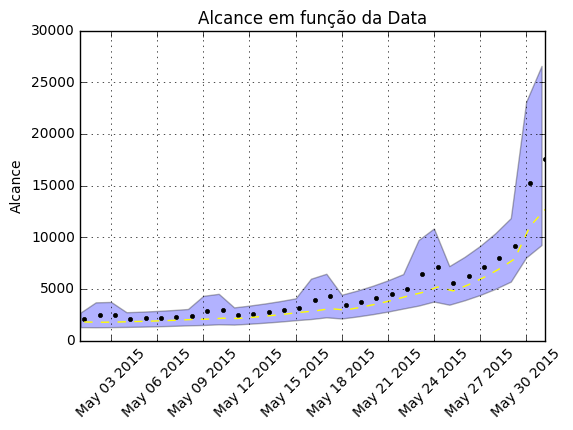

In [26]:
index = [i.strftime('%Y-%m-%d') for i in datas]
plt.plot(datas, medias, '.', color='black')
plt.plot(datas, medianas, '--', color='yellow')
plt.fill_between(index, quart_25, quart_75, facecolor='blue', alpha=0.3)
plt.title("Alcance em função da Data")
plt.ylabel("Alcance")
plt.xticks(rotation=45)
plt.grid()

## Alcance em função da Hora

In [27]:
grupo = "Alcance"

datas = dados.groupby("Hora").first()["Data&Hora"]
medias = dados.groupby("Hora").mean()[grupo]
medianas = dados.groupby("Hora").median()[grupo]
quart_25 = dados.groupby("Hora").quantile(.25)[grupo]
quart_75 = dados.groupby("Hora").quantile(.75)[grupo]

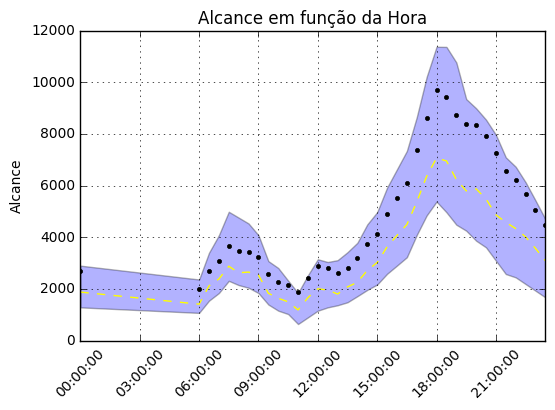

In [28]:
index = [i.strftime('%Y-%m-%d %H:%M') for i in datas]
plt.plot(datas, medias, '.', color='black')
plt.plot(datas, medianas, '--', color='yellow')
plt.fill_between(index, quart_25, quart_75, facecolor='blue', alpha=0.3)
plt.title("Alcance em função da Hora")
plt.ylabel("Alcance")
plt.xticks(rotation=45)
plt.grid()


### Então os períodos de maior alcance são entre 15 e 21 horas e mais próximos ao final do mês

# Segunda pergunta:
É possível identificar uma diferença de desempenho sazonal? Explique e demonstre.

*Design Thinking*

**E se...**,

Nós segregássemos os valores em madrugada, manhã, tarde e noite?

### Condição:

madrugada     0 |- 6

manhã         6 |- 12

tarde        12 |- 18

noite        18 |- 24

In [30]:
dados["Periodo"] = ['Madrugada' if i>=0 and i<6 else
                    'Manhã' if i>=6 and i<12 else
                    "Tarde" if i>=12 and i<18 else
                    "Noite"
                    for i in dados["Data&Hora"].dt.hour]

In [31]:
print(dados.tail())

            Data   Hora  Alcance  Curtidas  Cliques_no_link  \
1142  31/05/2015  22:00    31201      1040              208   
1143  31/05/2015  22:30    28890       963              193   
1144  31/05/2015  23:00    26001       867              173   
1145  31/05/2015  23:30    23112       770              154   
1146  31/05/2015  00:00    11556       385               77   

               Data&Hora    Periodo  
1142 2015-05-31 22:00:00      Noite  
1143 2015-05-31 22:30:00      Noite  
1144 2015-05-31 23:00:00      Noite  
1145 2015-05-31 23:30:00      Noite  
1146 2015-05-31 00:00:00  Madrugada  


In [32]:
periodo = "Manhã"
print(dados[dados["Periodo"] == periodo].describe())

            Alcance    Curtidas  Cliques_no_link
count    372.000000  372.000000       372.000000
mean    2749.543011   91.661290        24.422043
std     2082.263222   69.379019        18.301366
min      500.000000   17.000000         5.000000
25%     1300.750000   43.000000        11.000000
50%     2118.000000   71.000000        19.000000
75%     3385.750000  113.000000        32.000000
max    12712.000000  424.000000       101.000000


In [33]:
periodo = "Tarde"
print(dados[dados["Periodo"] == periodo].describe())

            Alcance    Curtidas  Cliques_no_link
count    372.000000  372.000000       372.000000
mean    4560.169355  151.994624        39.846774
std     3804.558783  126.815803        31.931626
min      900.000000   30.000000         9.000000
25%     2070.000000   69.000000        17.750000
50%     3281.500000  109.000000        29.000000
75%     5408.000000  180.250000        50.000000
max    23112.000000  770.000000       197.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05C11070>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0C4D0FB0>]], dtype=object)

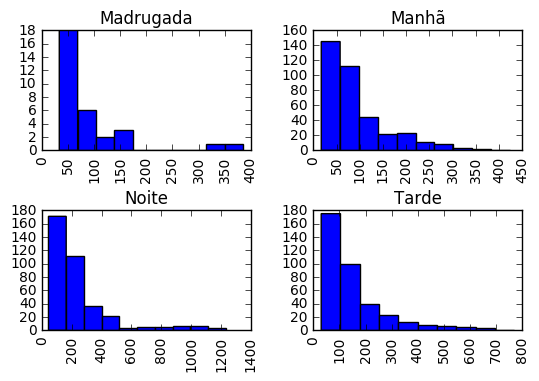

In [34]:
dados["Curtidas"].hist(by=dados["Periodo"])

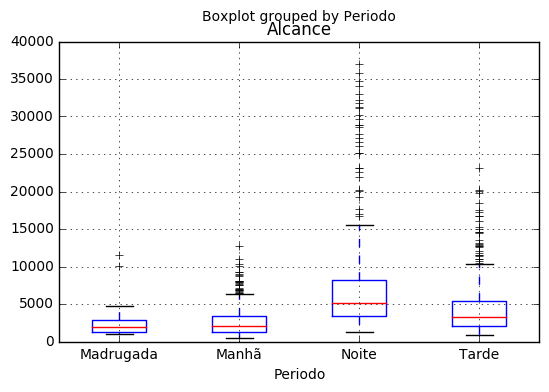

In [35]:
dados.boxplot(column='Alcance', by="Periodo")

In [36]:
madrugada = dados[dados["Periodo"] == "Madrugada"]
manha = dados[dados["Periodo"] == "Manhã"]
tarde = dados[dados["Periodo"] == "Tarde"]
noite = dados[dados["Periodo"] == "Noite"]
all_data = [madrugada["Alcance"],manha["Alcance"],tarde["Alcance"],noite["Alcance"]]

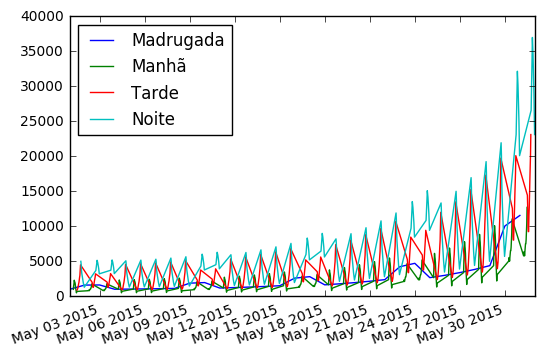

In [37]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(madrugada["Data&Hora"], madrugada["Alcance"], '-', label="Madrugada")
ax.plot(manha["Data&Hora"], manha["Alcance"], '-', label="Manhã")
ax.plot(tarde["Data&Hora"], tarde["Alcance"], '-', label="Tarde")
ax.plot(noite["Data&Hora"], noite["Alcance"], '-', label="Noite")
fig.autofmt_xdate()
plt.xticks(rotation=20)
plt.legend(loc=0)

## Resposta:

### Sim é possível! O desempenho é constântemente melhor de noite e de tarde

# Correlação entre as variáveis

In [38]:
print(dados.head())

         Data   Hora  Alcance  Curtidas  Cliques_no_link           Data&Hora  \
0  01/05/2015  06:00     1000        33               10 2015-05-01 06:00:00   
1  01/05/2015  06:30     1500        50               15 2015-05-01 06:30:00   
2  01/05/2015  07:00     1800        60               18 2015-05-01 07:00:00   
3  01/05/2015  07:30     2300        77               23 2015-05-01 07:30:00   
4  01/05/2015  08:00     2100        70               21 2015-05-01 08:00:00   

  Periodo  
0   Manhã  
1   Manhã  
2   Manhã  
3   Manhã  
4   Manhã  


In [39]:
corr = dados.corr()

In [40]:
print(corr)

                  Alcance  Curtidas  Cliques_no_link
Alcance          1.000000  0.999998         0.962050
Curtidas         0.999998  1.000000         0.962044
Cliques_no_link  0.962050  0.962044         1.000000


## Pergunta 3
### Crie uma previsão de alcance, curtidas e cliques no link para um post que foi realizado em 03/06/2015 às 16h, considere que o comportamento da rede se manteve o mesmo no período.

In [41]:
from scipy import stats
import matplotlib.dates as mdates
import datetime

In [42]:
xx = mdates.date2num([i for i in dados["Data&Hora"]])
x = dados["Data&Hora"]
y = dados["Alcance"]
slope, intercept, r_value, p_value, std_err = stats.linregress(xx,y)
lin_reg = [(slope*i) + intercept for i in xx]

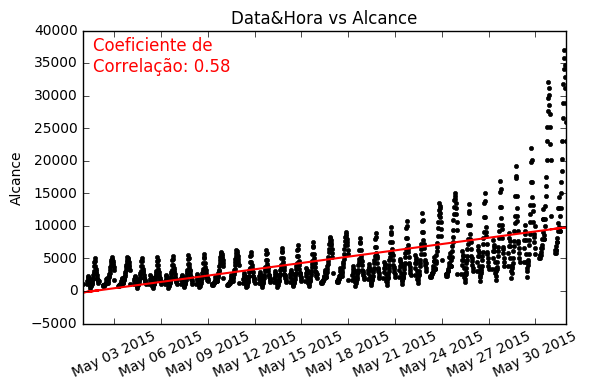

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, '.', color='black')
ax.plot(x, lin_reg, '-', linewidth=1.5, color='red')
ax.set_title(x.name + " vs " + y.name)
ax.set_ylabel(y.name)
ax.text(0.02, 0.98, 'Coeficiente de\nCorrelação: {:.2}'.format(r_value), horizontalalignment='left',
        verticalalignment='top', fontsize=12,transform=ax.transAxes, color='red')
for tick in ax.get_xticklabels():
    tick.set_rotation(25)
plt.tight_layout()
plt.show()

In [44]:
previsao_lin = slope*mdates.date2num(datetime.datetime.strptime("2015-06-03 16:00","%Y-%m-%d %H:%M")) + intercept
print(round(previsao_lin))

10655.0


# Porém 16 Horas está no nosso período da tarde

In [45]:
xx = mdates.date2num([i for i in tarde["Data&Hora"]])
x = tarde["Data&Hora"]
y = tarde["Alcance"]
slope, intercept, r_value, p_value, std_err = stats.linregress(xx,y)
lin_reg = [(slope*i) + intercept for i in xx]

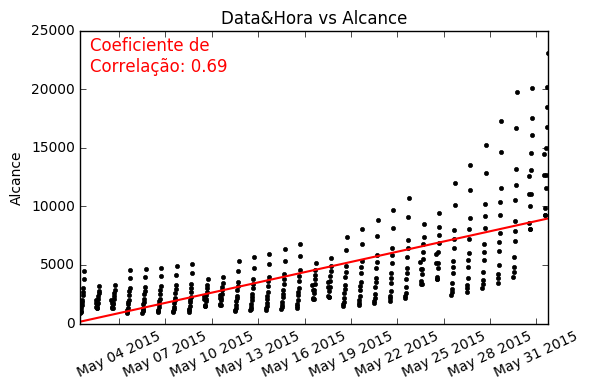

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, '.', color='black')
ax.plot(x, lin_reg, '-', linewidth=1.5, color='red')
ax.set_title(x.name + " vs " + y.name)
ax.set_ylabel(y.name)
ax.text(0.02, 0.98, 'Coeficiente de\nCorrelação: {:.2}'.format(r_value), horizontalalignment='left',
        verticalalignment='top', fontsize=12,transform=ax.transAxes, color='red')
for tick in ax.get_xticklabels():
    tick.set_rotation(25)
plt.tight_layout()
plt.show()

In [47]:
previsao_lin = slope*mdates.date2num(datetime.datetime.strptime("2015-06-03 16:00","%Y-%m-%d %H:%M")) + intercept
print(round(previsao_lin))

9816.0


In [48]:
import seaborn as sns

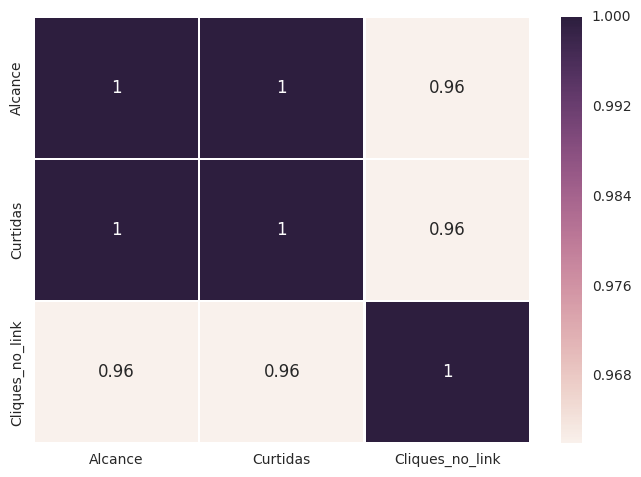

In [49]:
sns.heatmap(corr, annot=True, linewidths=1)

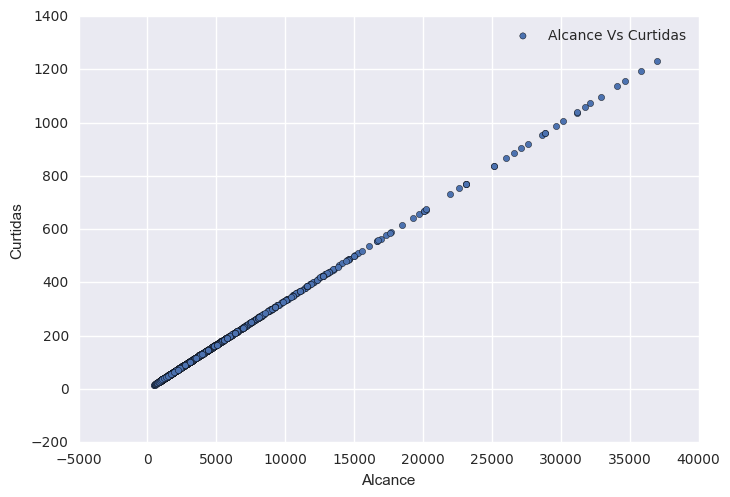

In [50]:
dados.plot.scatter(x='Alcance', y='Curtidas', label='Alcance Vs Curtidas')